In [1]:
1+1

2

In [2]:
import os
import numpy as np
import pandas as pd
from six.moves import cPickle
import PIL
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import multiprocessing
import random
import sklearn
from sklearn import metrics
import seaborn as sns
import cv2
import skimage
from skimage import restoration
import copy
import seaborn as sns

In [3]:
raw_RAD_id_list = os.listdir('/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/')
print(len(raw_RAD_id_list))
RAD_id_list = raw_RAD_id_list

15000


In [4]:
RAD_id_submit_list = os.listdir("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_Test_2/")
print(len(RAD_id_submit_list))

8000


In [86]:
image_size = 64
nt = 4 # number of timesteps used for sequences in training
image_scalar = 80
vmin = -1
vmax = 0.6 * image_scalar
step_size = 5

In [5]:
def check_RAD_id(RAD_id):
#     return RAD_id
    mean_list = []
    for k in range(61):
        mean_list.append(np.array(PIL.Image.open('/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png'
                         % (RAD_id, RAD_id,
                        k))).astype(np.int8).ravel().mean())
    mean_list = np.array(mean_list)
    if mean_list.mean() < -0.5:
        return None
    for k in range(59):
        if abs(mean_list[k] + mean_list[k + 2] - 2 * mean_list[k + 1]) > 2:
            return None
    return RAD_id

In [ ]:
pool = multiprocessing.Pool()
start_time = time.time()
print(time.strftime('start time: %Y-%m-%d %H:%M:%S', time.localtime()))
# map(check_RAD_id, raw_RAD_id_list[:100])
# print(time.strftime('start time: %Y-%m-%d %H:%M:%S', time.localtime()))
RAD_id_list = list(pool.map(check_RAD_id, raw_RAD_id_list))
RAD_id_list = [x for x in RAD_id_list if x is not None]
print(time.strftime('end time: %Y-%m-%d %H:%M:%S', time.localtime()))
print(time.strftime('%H:%M:%S', time.gmtime(time.time() - start_time)))
print(len(RAD_id_list))

0


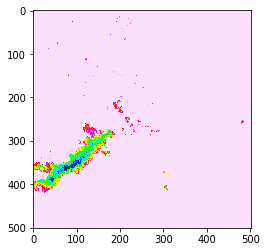

5


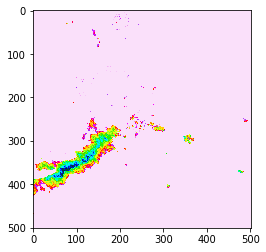

10


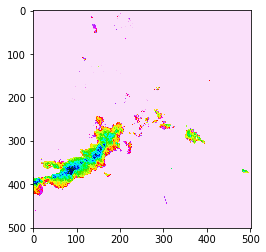

15


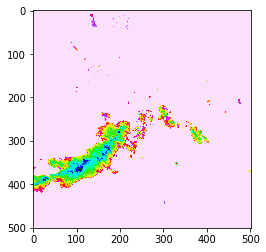

20


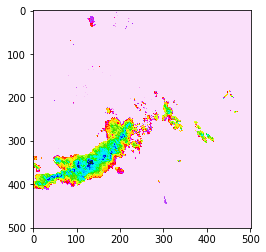

25


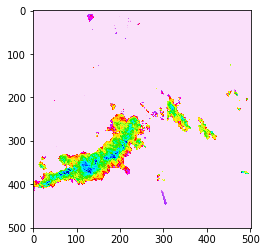

30


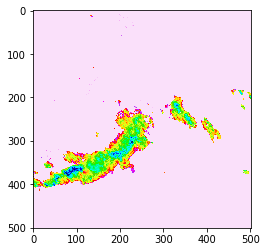

35


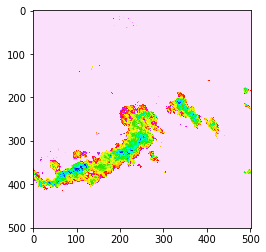

40


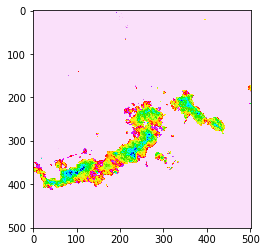

45


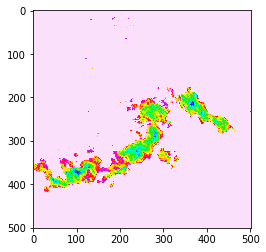

50


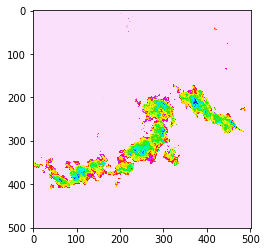

55


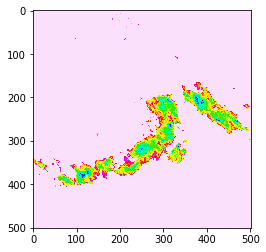

60


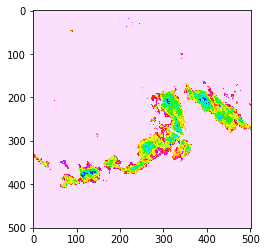

In [7]:
for counter, RAD_id in enumerate(RAD_id_list[-1:]):
    for i in range(0, 61, 5):
        temp_matrix = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, i))).astype(np.uint8)
#         temp_matrix = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, i)))
        temp_matrix = np.where(temp_matrix==255, 0, temp_matrix)
        print(i)
        plt.imshow(temp_matrix, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
        plt.show()
    temp_matrix_old = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 0))).astype(np.uint8)
    temp_matrix_new = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 5))).astype(np.uint8)
#     temp_matrix_old = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 0)))
    temp_matrix_old = np.where(temp_matrix_old==255, 0, temp_matrix_old)
#     temp_matrix_new = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 5)))
    temp_matrix_new = np.where(temp_matrix_new==255, 0, temp_matrix_new)

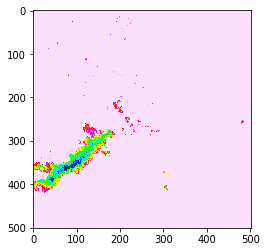

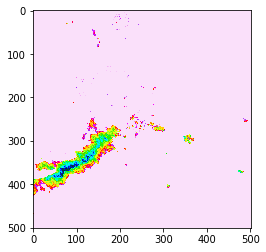

In [8]:
plt.imshow(temp_matrix_old, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
plt.show()
plt.imshow(temp_matrix_new, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
plt.show()

In [9]:
temp_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
temp_matrix_old

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
print(temp_matrix_old.shape)
print(temp_matrix_old.dtype)

(501, 501)
uint8


In [12]:
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

p0 = cv2.goodFeaturesToTrack(temp_matrix_old, mask = None, **feature_params)

In [13]:
p0

array([[[ 68., 379.]],

       [[173., 291.]],

       [[171., 275.]],

       [[ 86., 331.]],

       [[301., 405.]],

       [[306., 410.]],

       [[ 81., 375.]],

       [[165., 280.]],

       [[185., 286.]],

       [[ 58., 354.]],

       [[113., 363.]],

       [[ 26., 389.]],

       [[158., 314.]],

       [[224., 264.]],

       [[275., 277.]],

       [[101., 374.]],

       [[166., 314.]],

       [[217., 253.]],

       [[ 84., 342.]],

       [[262., 266.]],

       [[168., 327.]],

       [[152., 318.]],

       [[ 36., 380.]],

       [[  6., 395.]],

       [[  9., 365.]],

       [[158., 325.]],

       [[131., 292.]],

       [[114., 314.]],

       [[ 50., 401.]],

       [[ 43., 407.]],

       [[  9., 406.]],

       [[ 32., 367.]],

       [[153., 285.]]], dtype=float32)

In [14]:
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
p1, st, err = cv2.calcOpticalFlowPyrLK(temp_matrix_old, temp_matrix_new, p0, None, **lk_params)

In [19]:
color = np.random.randint(0,255,(100,3))

In [22]:
color[0].tolist()

[247, 43, 141]

In [15]:
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Create a mask image for drawing purposes
mask = np.zeros_like(temp_matrix_old)
# Select good points
good_new = p1[st==1]
good_old = p0[st==1]
# draw the tracks
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
    temp_matrix_new = cv2.circle(temp_matrix_new,(a,b),5,color[i].tolist(),-1)
img = cv2.add(temp_matrix_new,mask)

In [16]:
(a,b),(c,d)

((166.18336, 277.74423), (153.0, 285.0))

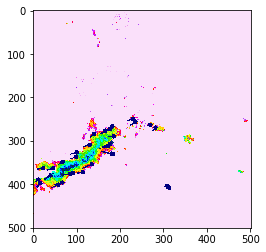

In [17]:
plt.imshow(img, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
plt.show()

RAD_426482464212534


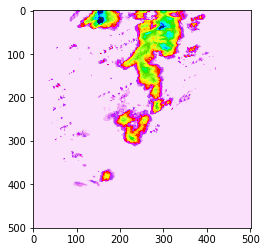

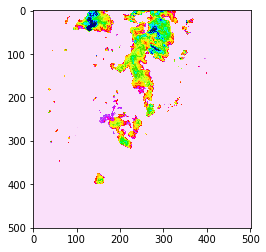

RAD_426482464222546


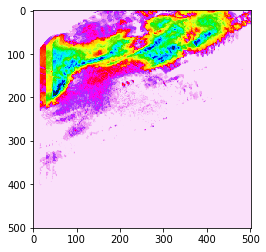

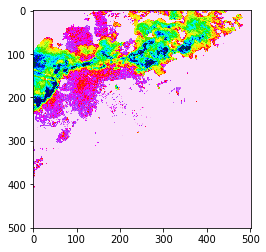

RAD_486582464229545


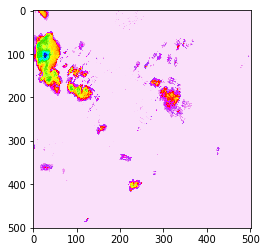

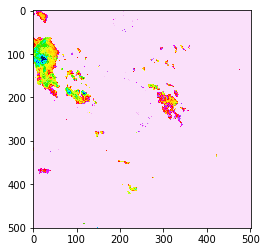

RAD_236682464222535


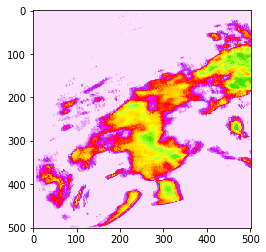

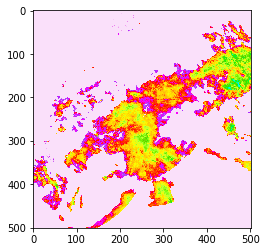

RAD_286582464219538


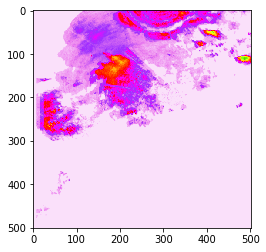

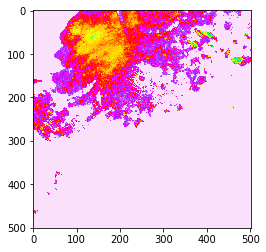

RAD_516482464232542


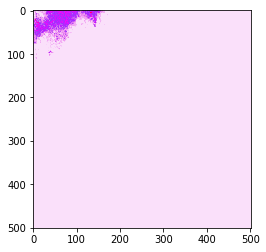

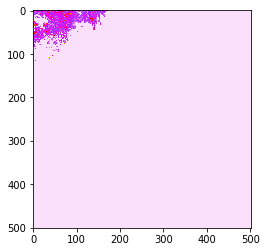

RAD_466382464219554


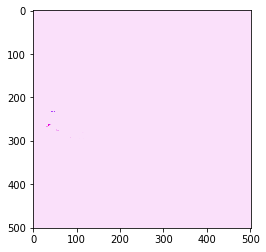

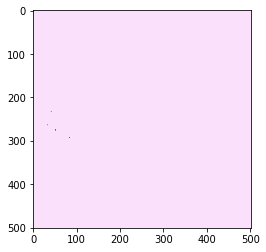

RAD_486482474239533


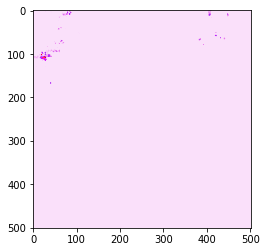

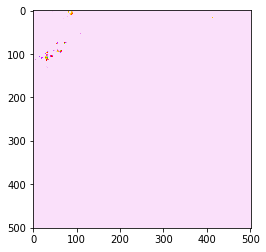

RAD_416582464219536


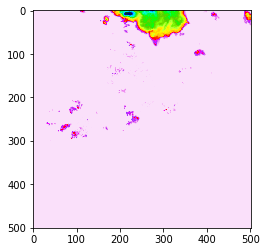

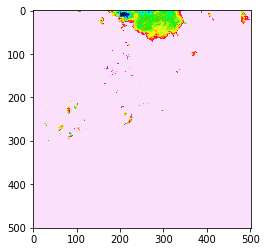

RAD_446582474229549


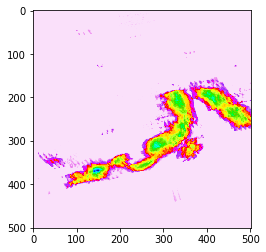

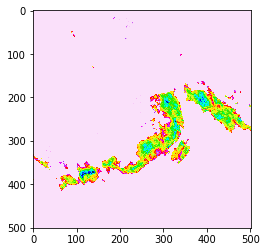

In [87]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

color = [255, 255, 255]

for counter, RAD_id in enumerate(RAD_id_list[-10:]):
    move_list = []
    temp_matrix_list = []
    print(RAD_id)
    for i in range(52, 55, 1):
#     for i in range(0, 60, 5):
#     for i in range(0, 5, 5):
        temp_matrix_old = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, i + 0))).astype(np.uint8)
        temp_matrix_new = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, i + step_size))).astype(np.uint8)
        temp_matrix_old = np.where(temp_matrix_old==255, 0, temp_matrix_old)
        temp_matrix_new = np.where(temp_matrix_new==255, 0, temp_matrix_new)
        temp_matrix_list.append(temp_matrix_new)
#         plt.imshow(temp_matrix_old, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
#         plt.imshow(temp_matrix_new, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
        
        p0 = cv2.goodFeaturesToTrack(temp_matrix_old, mask = None, **feature_params)
        # Create a mask image for drawing purposes
        mask = np.zeros_like(temp_matrix_old)

        # calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(temp_matrix_old, temp_matrix_new, p0, None, **lk_params)

        # Select good points
        good_new = p1[st==1]
        good_old = p0[st==1]
        
        move = (good_new - good_old).mean(axis=0)
        move_list.append(move)
        
        # draw the tracks
        for j,(new,old) in enumerate(zip(good_new,good_old)):
            a,b = new.ravel()
            c,d = old.ravel()
            mask = cv2.line(mask, (a,b),(c,d), color, 2)
            img = copy.deepcopy(temp_matrix_new)
            img = cv2.circle(img,(a,b),3,color,-1)
        img = cv2.add(img,mask)
        
#         print(i, i+5)
#         print(move)
#         plt.imshow(img, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
        
#         H = np.float32([[1,0,move[0]], [0,1,move[1]]])
#         res = cv2.warpAffine(img, H, (501, 501))
#         plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
#         plt.show()
    move_list = np.array(move_list)
    move = move_list.mean(axis=0)
    for i in range(len(temp_matrix_list)):
        k = (len(temp_matrix_list) - 1 - i)
        H = np.float32([[1,0,k*move[0]], [0,1,k*move[1]]])
        temp_matrix_list[i] = cv2.warpAffine(temp_matrix_list[i], H, (501, 501))
        
    temp_matrix_list = np.array(temp_matrix_list)
    temp_matrix = temp_matrix_list.mean(axis=0)
    H = np.float32([[1,0,move[0]], [0,1,move[1]]])
    res = cv2.warpAffine(temp_matrix, H, (501, 501))
    plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
    plt.show()
    plt.imshow(temp_matrix_new, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
    plt.show()

In [81]:
n_channels = 1
def data_generation(list_IDs_temp, batch_size, image_size, nt, step_size, image_scalar, offset=None, path='/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train'):
    '''
    nt * step_size + offset = 60
    '''
    X = np.empty((batch_size, nt, image_size, image_size, n_channels))
    y = np.empty((batch_size, image_size, image_size, n_channels))
    for i, RAD_id in enumerate(list_IDs_temp):
        if offset == None:
#             offset = random.randint(0, 30 - nt * step_size)
            offset = random.randint(0, 60 - nt * step_size)
        for j in range(nt):
            temp_matrix = np.empty((n_channels, image_size, image_size))
#             temp_matrix[0] = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, j * step_size + offset - 1)).resize((image_size, image_size))).astype(np.int8) / image_scalar + \
#                              np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, j * step_size + offset - 2)).resize((image_size, image_size))).astype(np.int8) / image_scalar
            temp_matrix[0] = np.array(PIL.Image.open("%s/%s/%s_%03d.png" % (path, RAD_id, RAD_id, j * step_size + offset)).resize((image_size, image_size))).astype(np.int8) / image_scalar
#             temp_matrix[2] = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, j * step_size + offset + 1)).resize((image_size, image_size))).astype(np.int8) / image_scalar + \
#                              np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, j * step_size + offset + 2)).resize((image_size, image_size))).astype(np.int8) / image_scalar
#             temp_matrix[1] = cv2.GaussianBlur(temp_matrix[0], (5, 5), 0)
#             temp_matrix[2] = cv2.GaussianBlur(temp_matrix[0], (9, 9), 0)
#             temp_matrix[0] = cv2.GaussianBlur(temp_matrix[0], (13, 13), 0)
            temp_matrix = np.rollaxis(temp_matrix, 0, 3)
            X[i][j] = temp_matrix
        temp_matrix = np.empty((n_channels, image_size, image_size))
        temp_matrix[0] = np.array(PIL.Image.open("%s/%s/%s_%03d.png" % (path, RAD_id, RAD_id, nt * step_size + offset)).resize((image_size, image_size))).astype(np.int8) / image_scalar
#         temp_matrix[1] = cv2.GaussianBlur(temp_matrix[0], (5, 5), 0)
#         temp_matrix[2] = cv2.GaussianBlur(temp_matrix[0], (9, 9), 0)
        temp_matrix[0] = cv2.GaussianBlur(temp_matrix[0], (13, 13), 0)
        temp_matrix = np.rollaxis(temp_matrix, 0, 3)
        y[i] = temp_matrix
    return X, y

In [107]:
start_time = time.time()
print(time.strftime("start time: %Y-%m-%d %H:%M:%S", time.localtime()))
model_abs_loss = []
model_sqr_loss = []
last_frame_abs_loss = []
last_frame_sqr_loss = []
for RAD_id_counter, RAD_id in enumerate(RAD_id_list[:50]):
    x_last = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 30 - step_size)).astype(np.uint8)
#     y_true_last = np.where(y_true_last==255, 0, y_true_last)
    y_true_last = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, 60)).astype(np.uint8)
    y_true_last = np.array(PIL.Image.open("/home/hadoop/Documents/Neutrino/SRAD2018/SRAD2018_train/%s/%s_%03d.png" % (RAD_id, RAD_id, i + step_size))).astype(np.uint8)
#     y_true_last = np.where(y_true_last==255, 0, y_true_last)
    y_pred_last = y_true_last
    H = np.float32([[1,0,move[0]], [0,1,move[1]]])
    y_pred_last = cv2.warpAffine(y_true_last, H, (501, 501))
    last_frame_abs_loss.append(sklearn.metrics.mean_absolute_error(y_true_last.astype(np.int), x_last.astype(np.int)))
    model_abs_loss.append(sklearn.metrics.mean_absolute_error(y_true_last.astype(np.int), y_pred_last.astype(np.int)))
    last_frame_sqr_loss.append(sklearn.metrics.mean_squared_error(y_true_last.astype(np.int), x_last.astype(np.int)))
    model_sqr_loss.append(sklearn.metrics.mean_squared_error(y_true_last.astype(np.int), y_pred_last.astype(np.int)))
    if RAD_id_counter % 10 == 0:
        print('RAD_id_counter=%5d\t\tIt takes %.2f' % (RAD_id_counter, time.time() - start_time))
model_abs_loss = np.array(model_abs_loss)
last_frame_abs_loss = np.array(last_frame_abs_loss)
model_sqr_loss = np.array(model_sqr_loss)
last_frame_sqr_loss = np.array(last_frame_sqr_loss)
print('     model_abs_loss=%.7f' % model_abs_loss.mean())
print('last_frame_abs_loss=%.7f' % last_frame_abs_loss.mean())
print('     model_sqr_loss=%.7f' % model_sqr_loss.mean())
print('last_frame_sqr_loss=%.7f' % last_frame_sqr_loss.mean())
print(time.strftime('It took  %H:%M:%S', time.gmtime(time.time() - start_time)))
print(time.strftime("end time: %Y-%m-%d %H:%M:%S", time.localtime()))

SyntaxError: invalid syntax (<ipython-input-107-6351c5478ef2>, line 10)

In [90]:
x.shape

(1, 4, 64, 64, 1)

In [57]:
move_list.mean(axis=0)

array([11.347363 , -3.7511127], dtype=float32)

In [43]:
PIL.ImageChops.offset(img.reshape((501,501,1)), xoffset=20)

AttributeError: 'numpy.ndarray' object has no attribute 'load'

In [46]:
img.shape

(501, 501)

In [44]:
H = np.float32([[1,0,100], [0,1,50]])
res = cv2.warpAffine(img, H, (501, 501)) #需要图像、变换矩阵、变换后的大小

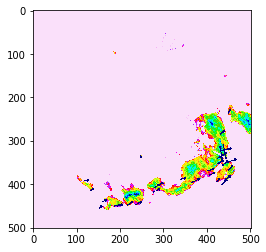

In [45]:
plt.imshow(res, cmap=cm.gist_ncar_r, vmin=vmin, vmax=vmax)
plt.show()

In [35]:
new - old

array([11.036987 , -3.4704285], dtype=float32)

In [39]:
(good_new - good_old).mean(axis=0)

array([10.393296 , -3.3050969], dtype=float32)

In [ ]:
temp_matrix = temp_matrix.reshape((501, 501, 1))

In [ ]:
detector = cv2.ORB_create()
kp1, des1 = detector.detectAndCompute(temp_matrix,None)

In [ ]:
cv2.cvtColor(temp_matrix_old, cv2.COLOR_BGR2GRAY)

# Reference
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html
- https://blog.csdn.net/on2way/article/details/46801063